In [1]:
from deep_rl import *
from my_agent import MyLLAgent

from my_logger import *
from my_config import *

import matplotlib
import matplotlib.pyplot as plt

In [37]:
set_one_thread()
select_device(-1) # -1 is CPU, a positive integer is the index of GPU

path = "log/minigrid_score_decay-42-mask-linear_comb/231026-110040"
config, agent = build_minigrid_config(None, log_dir=path)

# load agent
model_path = '{0}/{1}-{2}-model-{3}.bin'.format(path, config.agent_name, config.tag, config.env_name)
agent.load(model_path)

In [32]:
for k, v in agent.network.named_parameters():
    k_split = k.split('.')

    # remove every module that is not a mask (e.g., .weight, .betas)
    try: k_split[-1] = int(k_split[-1])
    except: continue

    n_active = (v >= 0).sum()
    n_cons = v.shape[0] * v.shape[1]
    active = n_active / n_cons
    print(k, active)

network.phi_body.layers.0.scores.0 tensor(0.0320)
network.phi_body.layers.1.scores.0 tensor(0.1701)
network.phi_body.layers.2.scores.0 tensor(0.1903)
network.fc_action.scores.0 tensor(0.3875)
network.fc_critic.scores.0 tensor(0.2250)


In [34]:
for k, v in agent.network.named_parameters():
    k_split = k.split('.')

    # remove every module that is not a mask (e.g., .weight, .betas)
    try: k_split[-1] = int(k_split[-1])
    except: continue

    n_active = (v >= 0).sum()
    n_cons = v.shape[0] * v.shape[1]
    active = n_active / n_cons
    print(k, active)

network.phi_body.layers.0.scores.0 tensor(0.0129)
network.phi_body.layers.1.scores.0 tensor(0.0970)
network.phi_body.layers.2.scores.0 tensor(0.1307)
network.fc_action.scores.0 tensor(0.3413)
network.fc_critic.scores.0 tensor(0.1750)


In [35]:
weight_matrix = None

for k, v in agent.network.named_parameters():
    # only score values
    if 'scores' not in k:
        continue
    # only the current index
    if int(k.split('.')[-1]) != 0:
        continue

    print(k, v.shape)

    if k == 'network.phi_body.layers.0.scores.0':
        weight_matrix = v.data

network.phi_body.layers.0.scores.0 torch.Size([200, 505])
network.phi_body.layers.1.scores.0 torch.Size([200, 200])
network.phi_body.layers.2.scores.0 torch.Size([200, 200])
network.fc_action.scores.0 torch.Size([4, 200])
network.fc_critic.scores.0 torch.Size([1, 200])


In [38]:
for k, v in agent.network.named_parameters():
    k_split = k.split('.')

    # remove every module that is not a mask (e.g., .weight, .betas)
    try: k_split[-1] = int(k_split[-1])
    except: continue

    n_active = (v >= 0).sum()
    n_cons = v.shape[0] * v.shape[1]
    active = n_active / n_cons
    print(k, active)

network.phi_body.layers.0.scores.0 tensor(0.0133)
network.phi_body.layers.0.scores.1 tensor(0.0103)
network.phi_body.layers.1.scores.0 tensor(0.0948)
network.phi_body.layers.1.scores.1 tensor(0.0811)
network.phi_body.layers.2.scores.0 tensor(0.1147)
network.phi_body.layers.2.scores.1 tensor(0.0768)
network.fc_action.scores.0 tensor(0.3275)
network.fc_action.scores.1 tensor(0.3125)
network.fc_critic.scores.0 tensor(0.1750)
network.fc_critic.scores.1 tensor(0.1300)


0.01287128712871287


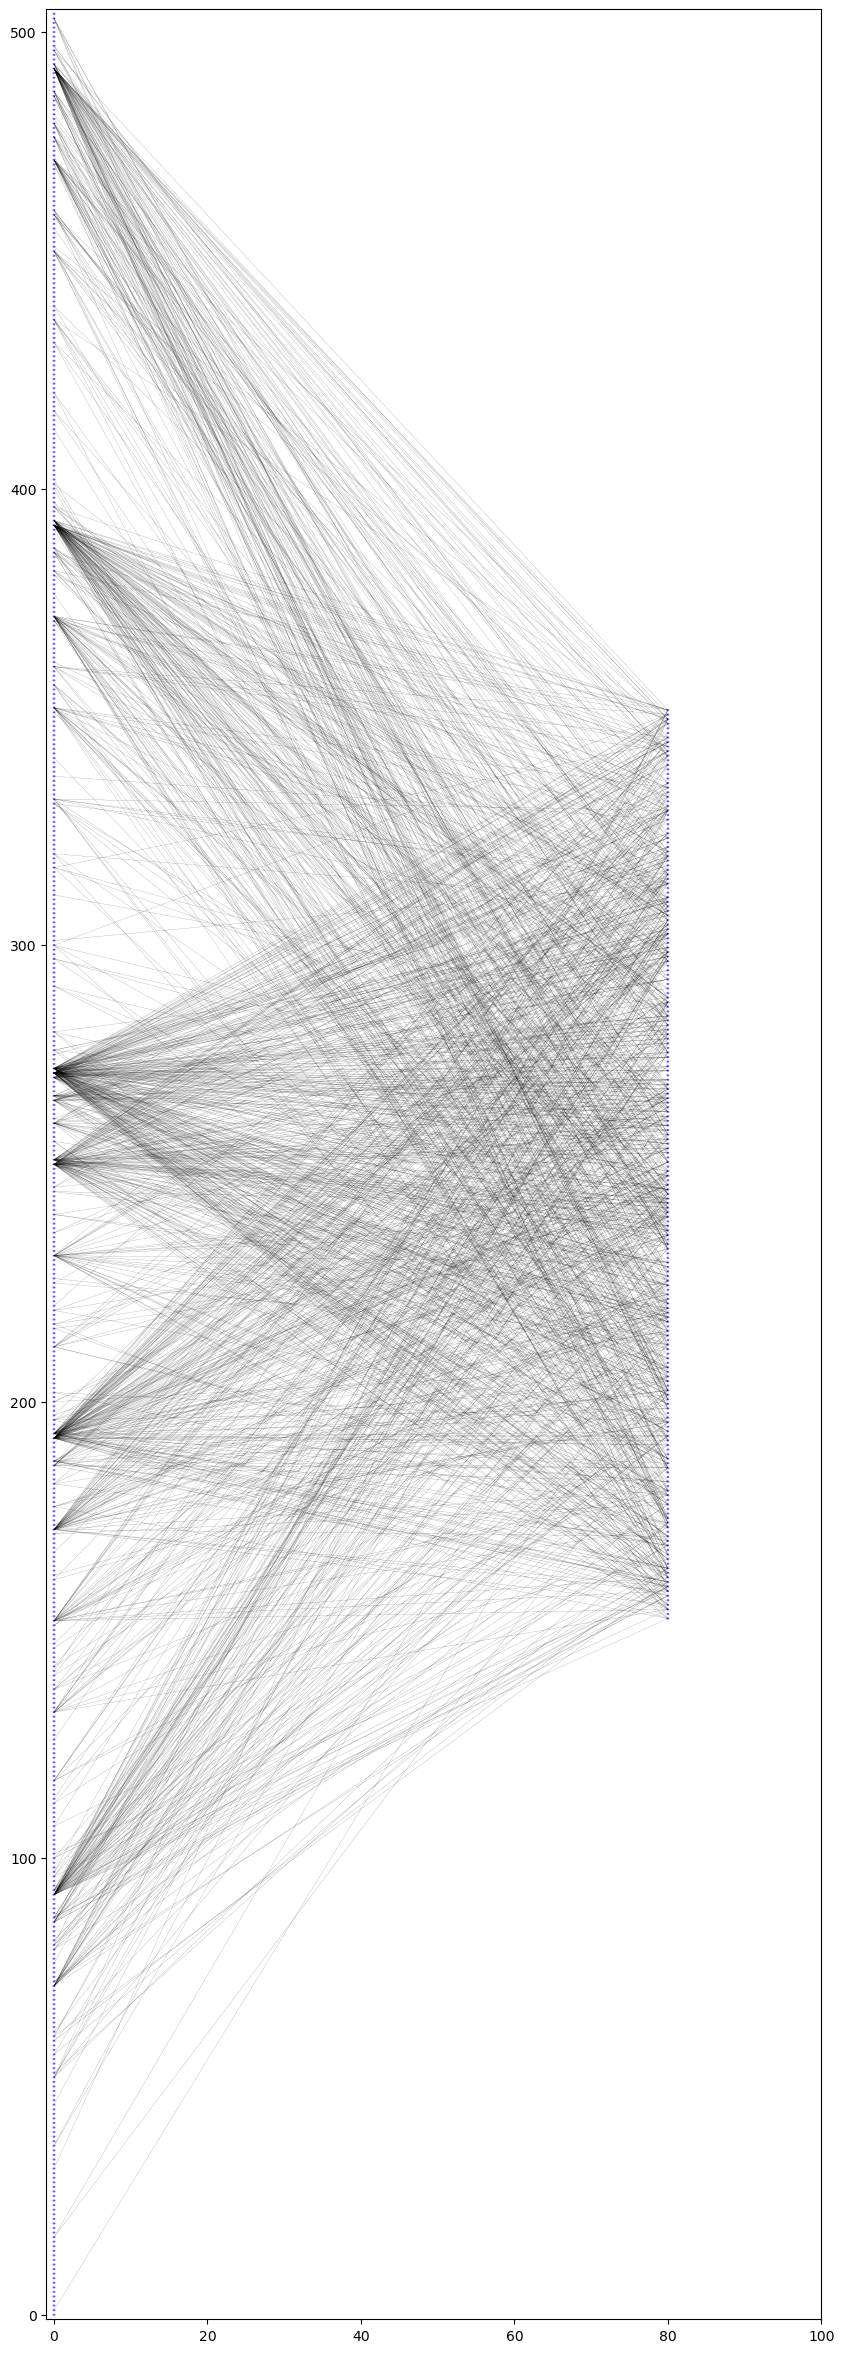

In [36]:
fig, ax = plt.subplots(figsize=(10, 30))

dimensions = [505, 200]

positions = []
for i, n in enumerate(dimensions):
    positions.append(np.arange(max(dimensions) / 2 - n / 2, max(dimensions) / 2 + n / 2))

for i, pos in enumerate(positions):
    for p in pos:
        circle = plt.Circle((i * 80, p), 0.1, color='blue', alpha=0.5)
        ax.add_patch(circle)

yes = 0
summ = 0
for i in range(dimensions[0]):
    for k in range(dimensions[1]):
        if weight_matrix[k, i] >= 0:
            line = plt.Line2D([0, 80], [positions[0][i], positions[1][k]], color='black', lw=0.1, alpha=0.8)
            ax.add_line(line)
            yes += 1
        summ += 1

print(yes / summ)

ax.set_xlim(-1, 100)
ax.set_ylim(-1, max(dim))
plt.show()